<a href="https://colab.research.google.com/github/NIP-Data-Computation/show-and-tell/blob/master/dahnag_show_and_tell_week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Author**: Dahna Galvez

**Date Created**: October 11, 2020

**Last Updated**: October 12, 2020 

**Description**: Application of Week 7 lessons in examining the customs dataset: Import cost spent by Countries from 2013 to 2017

**Week 7 Coverage**:
1. Introduction to Data Science in Python (*Data analyst track)*
2. Data types for Data Science in Python
3. Data Manipulation with pandas *(Data analyst track)*
4. Python data science toolbox (part 1)

As a preliminary: google drive mount, mount success verification, work directory change

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!ls drive/My\ Drive/NIP-Data-Computation-Group-Drive/Datasets/PHL\ Customs\ Open\ Data/clean/csv

boc_lite_2012_2019_top9_hscode.csv  boc_lite_2015.csv  boc_lite_2019.csv
boc_lite_2012.csv		    boc_lite_2016.csv  gapminder.csv
boc_lite_2013.csv		    boc_lite_2017.csv
boc_lite_2014.csv		    boc_lite_2018.csv


In [3]:
%cd drive/My\ Drive/NIP-Data-Computation-Group-Drive/Datasets/PHL\ Customs\ Open\ Data/clean/csv

/content/drive/.shortcut-targets-by-id/1pfxnf06OodnUo3H4NgkxVN6pA2FI9hh_/NIP-Data-Computation-Group-Drive/Datasets/PHL Customs Open Data/clean/csv


In [4]:
#Importing necessary modules
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
df_2013 = pd.read_csv('boc_lite_2013.csv', encoding="latin-1")

In [6]:
print(df_2013.head())
print(df_2013.info())

               uid    ty      tq  ...  countryexport_iso3 subport  port
0  2013q1 00000001  2013  2013q1  ...                 CHN     NaN   NaN
1  2013q1 00000002  2013  2013q1  ...                 KOR     NaN   NaN
2  2013q1 00000003  2013  2013q1  ...                 KOR     NaN   NaN
3  2013q1 00000004  2013  2013q1  ...                 KOR     NaN   NaN
4  2013q1 00000005  2013  2013q1  ...                 VNM     NaN   NaN

[5 rows x 30 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1225431 entries, 0 to 1225430
Data columns (total 30 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   uid                   1225431 non-null  object 
 1   ty                    1225431 non-null  int64  
 2   tq                    1225431 non-null  object 
 3   tm                    0 non-null        float64
 4   entry                 1225431 non-null  object 
 5   hscode                1225431 non-null  int64  
 6   goo

In here, I first checked ```df_2013``` to inspect which 5 countries spent the most on import cost.

In [7]:
print(df_2013.groupby('countryorigin_iso3')
              ['dutiablevalueforeign'].sum().sort_values(ascending=False))

countryorigin_iso3
CHN    9.271415e+09
USA    5.944247e+09
THA    5.757603e+09
KOR    4.558865e+09
JPN    4.498348e+09
           ...     
KGZ    5.011500e+02
AIA    2.090500e+02
GIN    1.503400e+02
GNQ    1.320200e+02
BDI    7.528000e+01
Name: dutiablevalueforeign, Length: 189, dtype: float64


In [8]:
#List of countries obtained from number 3
countries = ['CHN','USA','THA','KOR','JPN']

#Can be a function

#Storage of datapoints
import_CHN = []
import_USA = []
import_THA = []
import_KOR = []
import_JPN = []
year = []

for i in range(3,8):
  #Load CSV files
  filename = 'boc_lite_201' + str(i) + '.csv'
  
  #Read csv files
  df = pd.read_csv(filename, encoding="latin-1")

  for c in countries:
    count = df[df['countryorigin_iso3'] == c]['dutiablevalueforeign'].sum()
    if c == 'CHN':
      import_CHN.append(count)
    elif c == 'USA':
      import_USA.append(count)
    elif c == 'THA':
      import_THA.append(count)
    elif c == 'KOR':
      import_KOR.append(count)
    else:
      import_JPN.append(count)

  year.append(2010+ i)

dframe = pd.DataFrame({'CHN':import_CHN, 'USA':import_USA, 'THA':import_THA,
                       'KOR':import_KOR, 'JPN':import_JPN, 'year':year})

print(dframe)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,28,29) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,25,28,29) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


            CHN           USA           THA           KOR           JPN  year
0  9.271415e+09  5.944247e+09  5.757603e+09  4.558865e+09  4.498348e+09  2013
1  1.280843e+10  6.427889e+09  6.439776e+09  6.025983e+09  6.209536e+09  2014
2  2.388079e+10  9.273061e+09  1.393389e+10  6.629657e+09  1.163499e+10  2015
3  2.701186e+10  1.089840e+10  1.977664e+10  8.261206e+09  1.814579e+10  2016
4  2.592804e+10  1.154561e+10  4.849678e+10  1.687400e+10  2.623810e+10  2017


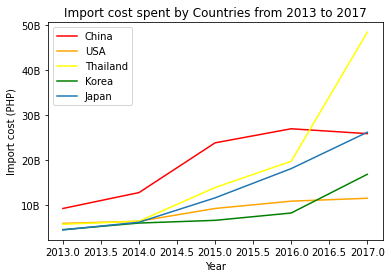

In [9]:
plt.plot(dframe['year'], dframe['CHN'], label = 'China', color = 'red')
plt.plot(dframe['year'], dframe['USA'], label = 'USA',color='orange')
plt.plot(dframe['year'], dframe['THA'], label = 'Thailand', color = 'yellow')
plt.plot(dframe['year'], dframe['KOR'], label = 'Korea', color='green')
plt.plot(dframe['year'], dframe['JPN'], label = 'Japan')

# add labels
plt.title('Import cost spent by Countries from 2013 to 2017')
plt.xlabel('Year')
plt.ylabel('Import cost (PHP)')
plt.yticks([10000000000, 20000000000, 30000000000, 40000000000, 50000000000],
           ['10B','20B','30B','40B','50B'])
plt.legend()

# display plots
plt.show()

In [10]:
#List of countries obtained from number 3
countries = ['CHN','USA','THA','KOR','JPN']

#Storage of datapoints
import_CHN = []
import_USA = []
import_THA = []
import_KOR = []
import_JPN = []
year = []

for i in range(3,8):
  #Load CSV files
  filename = 'boc_lite_201' + str(i) + '.csv'
  
  #Read csv files
  df = pd.read_csv(filename, encoding="latin-1")

  for c in countries:
    count = df[df['countryorigin_iso3'] == c]['dutiestaxes'].sum()
    if c == 'CHN':
      import_CHN.append(count)
    elif c == 'USA':
      import_USA.append(count)
    elif c == 'THA':
      import_THA.append(count)
    elif c == 'KOR':
      import_KOR.append(count)
    else:
      import_JPN.append(count)

  year.append(2010+ i)

dframe = pd.DataFrame({'CHN':import_CHN, 'USA':import_USA, 'THA':import_THA,
                       'KOR':import_KOR, 'JPN':import_JPN, 'year':year})

print(dframe)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,28,29) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,25,28,29) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


            CHN          USA          THA          KOR          JPN  year
0   47740527838  16160799619  26733793879  27487702274  16026338900  2013
1   69874830926  19317909526  31819725366  43497662009  18722840383  2014
2   72127640117  20560161463  38196050337  33521968590  24337217720  2015
3   90421432967  22667702058  44942710529  30093437666  34542907458  2016
4  104116081825  23199039968  54089507986  38526653268  41004510780  2017


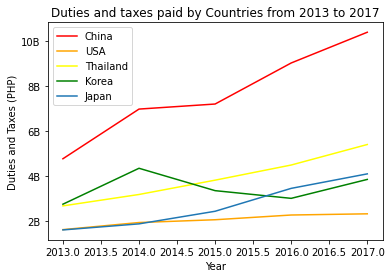

In [18]:
plt.plot(dframe['year'], dframe['CHN'], label = 'China', color = 'red')
plt.plot(dframe['year'], dframe['USA'], label = 'USA',color='orange')
plt.plot(dframe['year'], dframe['THA'], label = 'Thailand', color = 'yellow')
plt.plot(dframe['year'], dframe['KOR'], label = 'Korea', color='green')
plt.plot(dframe['year'], dframe['JPN'], label = 'Japan')

# add labels
plt.title('Duties and taxes paid by Countries from 2013 to 2017')
plt.xlabel('Year')
plt.ylabel('Duties and Taxes (PHP)')
plt.yticks([20000000000, 40000000000, 60000000000, 80000000000, 100000000000],
           ['2B','4B','6B','8B','10B'])
plt.legend()

# display plots
plt.show()